In [1]:
from utils import *
from metadata import *
import utils
# utils.init_dev(utils.get_dev())
# utils.allow_growth()
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!cd /mnt/nfs1703/kchen/imagenet-raw/

imname='n03692522/n03692522_10074.JPEG'

import cv2
cv2.imread(imname)

In [2]:
tree=ori_tree

In [5]:
def stat_info(imagenet1k):
    nimgs=[]
    for node in imagenet1k:
        imagepath = get_imagepath(node).strip('.tar')
        if osp.exists(imagepath):
            nimgs.append(len(os.listdir(imagepath))) 
        else:
            nimg=0
            for node_ in find_child(ori_tree,node): 
                imagepath=get_imagepath(node_).strip('.tar')
                nimg+=len(os.listdir(imagepath)) 
            if nimg ==0:
#                 print node_
                pass
            else:
                nimgs.append(nimg) 

    nimgs = np.sort(nimgs)[::-1]
    print sum(nimgs),sum(nimgs)/len(nimgs),len(nimgs)
    
    fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(9,2))
    _=axes[0].hist(nimgs)
    axes[1].plot(nimgs[nimgs<3048])
#     plt.yscale('log') 
    return nimgs

812895 1215 669


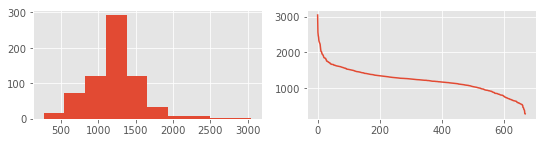

In [6]:
for imagenet in [imagenet600]:#,imagenet7k,imagenet22k]:
    _=stat_info(imagenet)

1431432 1453 985
6166741 826 7459
9414039 549 17142


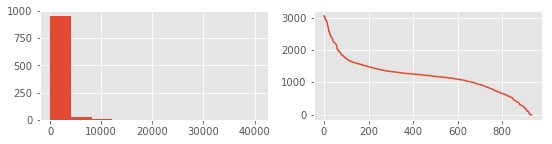

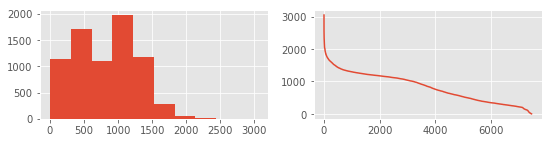

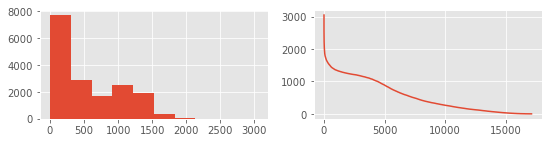

In [7]:
for imagenet in [imagenet1k,imagenet7k,imagenet22k]:
    _=stat_info(imagenet)

In [8]:
# nimgs={}
# os.chdir('/mnt/nfs1703/kchen/imagenet-raw/')
# for d in os.listdir('.'):
#     nimgs[d]=len(os.listdir(d))

# names,vals = np.array(nimgs.keys()),np.array(nimgs.values())

# len(nimgs)

# nimgs=utils.unpickle('./nimgs.pkl')